In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Load Data
# King County House Prices Data
df = pd.read_csv('kingcounty_house_sales.csv')

In [25]:
# Inspect Data
print(df.head())

  DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
0   2014-09-16     280000     1000102      Multiplex  2014-09-01   405100   
1   2006-06-16    1000000     1200013  Single Family  2006-06-01   404400   
2   2007-01-29     745000     1200019  Single Family  2007-01-01   425600   
3   2008-02-25     425000     2800016  Single Family  2008-02-01   418400   
4   2013-03-29     240000     2800024  Single Family  2013-03-01   351600   

   zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  Bedrooms  \
0  0.930836      300805.0               2     9373  ...       3.00         6   
1  0.929228     1076162.0               1    20156  ...       3.75         4   
2  0.977941      761805.0               1    26036  ...       1.75         4   
3  0.961397      442065.0               1     8618  ...       3.75         5   
4  0.807904      297065.0               1     8620  ...       1.75         4   

   BldgGrade  YrBuilt  YrRenovated  TrafficNoise  LandVa

In [26]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise

In [27]:
print(df.describe())

          SalePrice    PropertyID        zhvi_px      zhvi_idx  AdjSalePrice  \
count  2.268700e+04  2.268700e+04   22687.000000  22687.000000  2.268700e+04   
mean   5.079244e+05  4.666164e+09  392181.923569      0.901153  5.652333e+05   
std    3.466368e+05  2.877700e+09   36349.866645      0.083525  3.854029e+05   
min    3.000000e+03  1.000102e+06  311600.000000      0.715993  3.368000e+03   
25%    3.250000e+05  2.212325e+09  360700.000000      0.828814  3.605630e+05   
50%    4.246500e+05  4.006000e+09  403200.000000      0.926471  4.713150e+05   
75%    5.850000e+05  7.417700e+09  421200.000000      0.967831  6.494110e+05   
max    1.100000e+07  9.906000e+09  435200.000000      1.000000  1.164486e+07   

       NbrLivingUnits       SqFtLot  SqFtTotLiving  SqFtFinBasement  \
count    22687.000000  2.268700e+04   22687.000000     22687.000000   
mean         1.018821  1.174633e+04    2080.165734       293.233305   
std          0.159752  2.901602e+04     913.742170       439.45460

In [28]:
## Inspect missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("Missing values in each column:\n")
print(missing_data)

Missing values in each column:

Series([], dtype: int64)


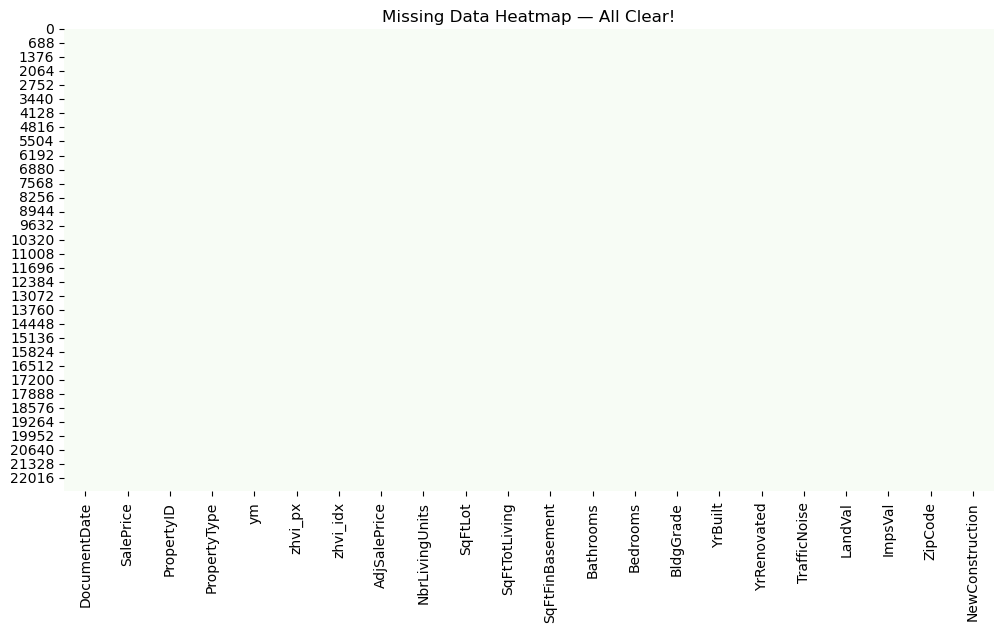

In [29]:
## Visual inspection of missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Data Heatmap — All Clear!")
plt.show()

In [30]:
#Extract Outlier Data
## Calculate IQR
Q1 = df['SqFtTotLiving'].quantile(0.25)
Q3 = df['SqFtTotLiving'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = (df['SqFtTotLiving'] < Q1 - 1.5 * IQR) | (df['SqFtTotLiving'] > Q3 + 1.5 * IQR)

# Extract outlier rows
outliers = df[outlier_condition]

# Display number of outliers and preview
print(f"Number of outliers in SqFtTotLiving: {outliers.shape[0]}")
print(outliers[['SqFtTotLiving', 'SalePrice']].head())

Number of outliers in SqFtTotLiving: 584
     SqFtTotLiving  SalePrice
73            5050     531000
80            5000    1713000
81            5050    1852000
82            6210    3650000
125           5210    1020000


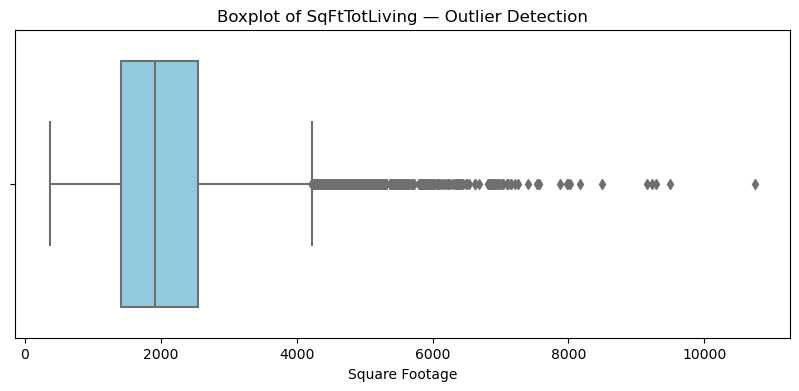

In [31]:
# Visual inspection of Outlier Data
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SqFtTotLiving'], color='skyblue')
plt.title('Boxplot of SqFtTotLiving — Outlier Detection')
plt.xlabel('Square Footage')
plt.show()

In [32]:
# Removal of Outliers from Data
Q1 = df['SqFtTotLiving'].quantile(0.25)
Q3 = df['SqFtTotLiving'].quantile(0.75)
IQR = Q3 - Q1

# Keep only non-outlier rows
df = df[(df['SqFtTotLiving'] >= Q1 - 1.5 * IQR) & (df['SqFtTotLiving'] <= Q3 + 1.5 * IQR)]

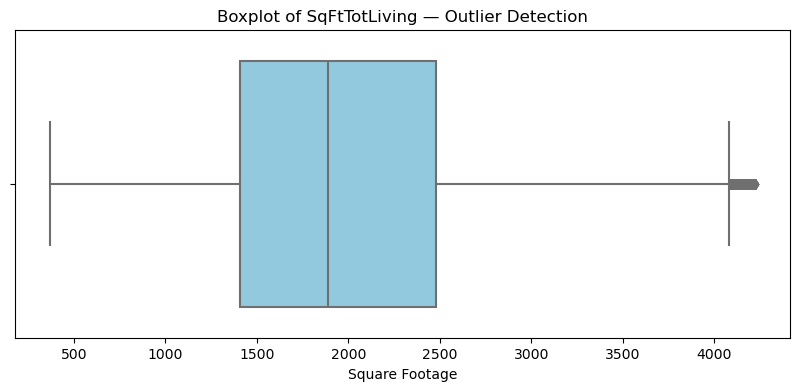

In [33]:
#  Visual Inspection of Data(w/o Outliers)
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SqFtTotLiving'], color='skyblue')
plt.title('Boxplot of SqFtTotLiving — Outlier Detection')
plt.xlabel('Square Footage')
plt.show()

In [34]:
# Feature Engineering
# Create house age feature
df['house_age'] = 2025 - df['YrBuilt']

# Create renovation status feature
df['was_renovated'] = df['YrRenovated'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
# Select Features and Target
X = df[['SqFtTotLiving', 'house_age', 'was_renovated']]
y = df['SalePrice']

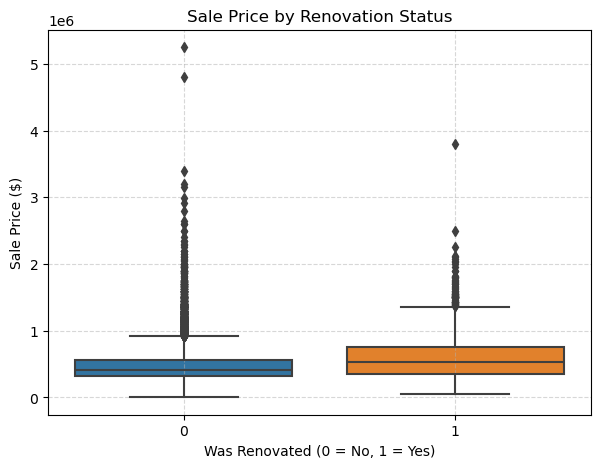

In [36]:
# Boxplot: Sale Price by Renovation Status
# This shows how renovation impacts sale price — expect higher medians for renovated homes.
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='was_renovated', y='SalePrice')
plt.title('Sale Price by Renovation Status')
plt.xlabel('Was Renovated (0 = No, 1 = Yes)')
plt.ylabel('Sale Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [37]:
# Scatter Plot: House Age vs. Sale Price, Colored by Renovation
# This adds a layer of insight — you’ll see whether newer or older homes benefit more from renovations.

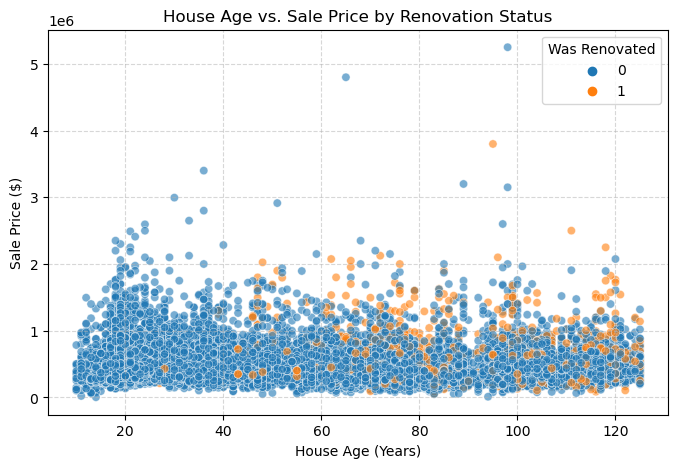

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='house_age', y='SalePrice', hue='was_renovated', alpha=0.6)
plt.title('House Age vs. Sale Price by Renovation Status')
plt.xlabel('House Age (Years)')
plt.ylabel('Sale Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Was Renovated')
plt.show()


In [39]:
#  Model Implementation_ Split and Train the Data

In [40]:
# Split the Data into Test/Train Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


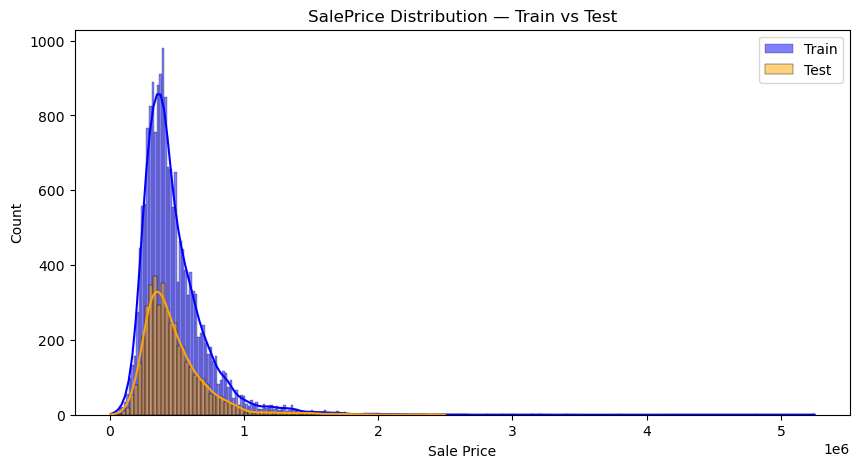

In [41]:
# Visualize Train-Test Distribution
plt.figure(figsize=(10,5))
sns.histplot(y_train, color='blue', label='Train', kde=True)
sns.histplot(y_test, color='orange', label='Test', kde=True)
plt.title('SalePrice Distribution — Train vs Test')
plt.xlabel('Sale Price')
plt.legend()
plt.show()

In [19]:
# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate and Visualize our Model

In [20]:
## Model Accuracy
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 33603337517.81
R-squared: 0.4271


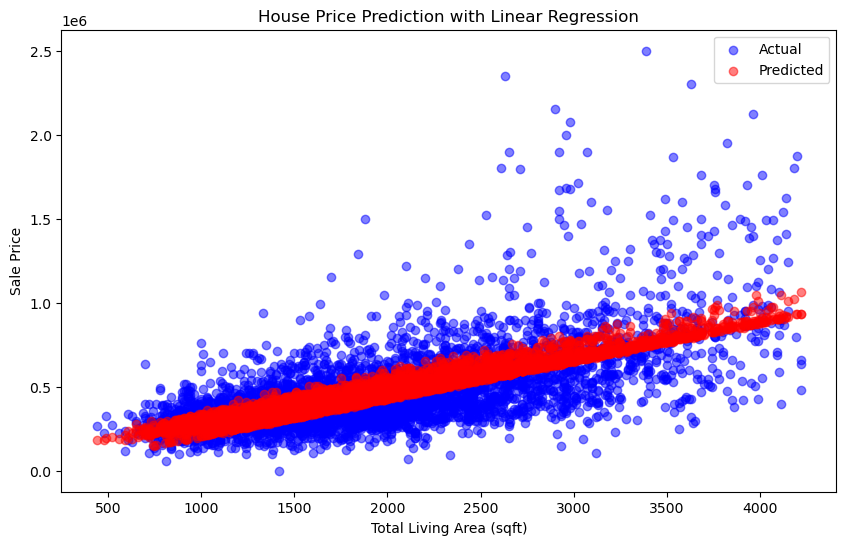

In [21]:
## Visual Test: Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(X_test['SqFtTotLiving'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['SqFtTotLiving'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Total Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('House Price Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Visual Test: Residuals

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


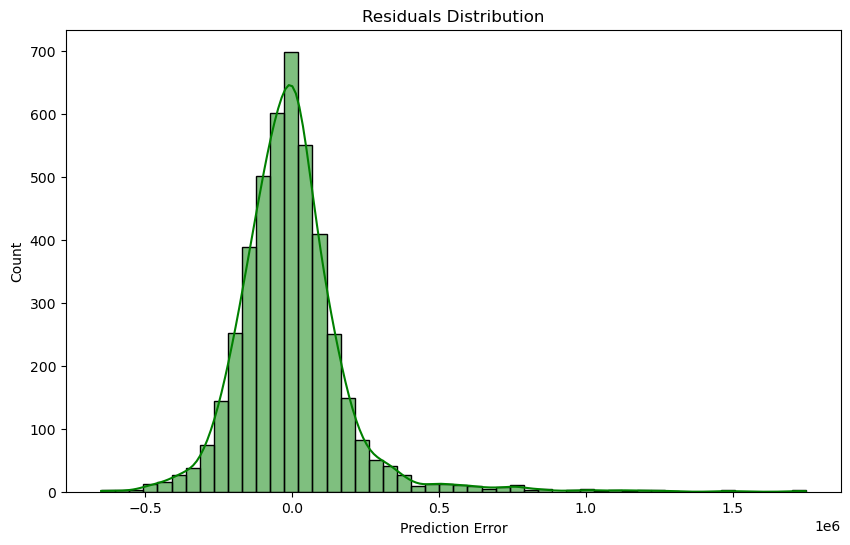

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error')
plt.show()
